In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = mach_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
#     weights = vertex_labeling.Weights(data_fit=0.1, mig=10.0, comig=5.0, seed_site=1.0, reg=0.8, gen_dist=0.0)

#     vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
#                                                 weights=weights, p=r, node_idx_to_label=idx_to_label, 
#                                                 max_iter=150, batch_size=64,
#                                                 custom_colors=custom_colors, primary="breast", show_top_trees=False)
    
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                weights=weights, p=r, node_idx_to_label=idx_to_label,
                                                batch_size=32, init_temp=30, final_temp=0.01, 
                                                custom_colors=custom_colors, primary="breast", show_top_trees=False, 
                                                visualize_intermediates=False, verbose=True)


        

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']


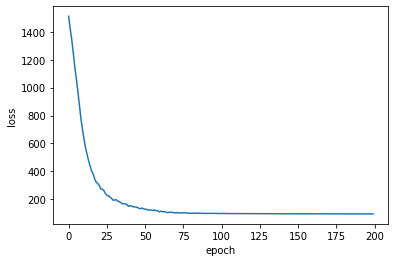

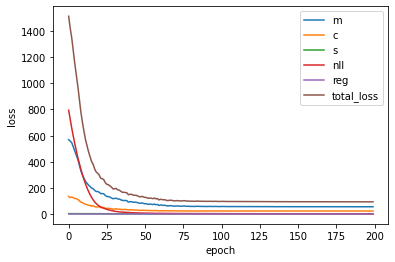

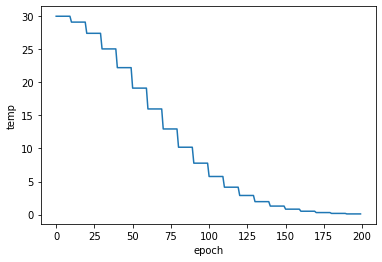

****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.523
Reg: 6.0
Loss: 87.523


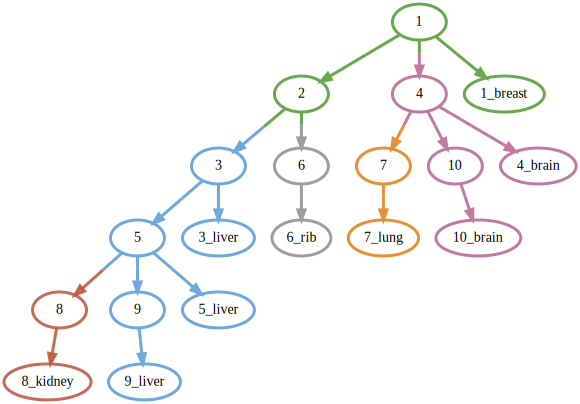

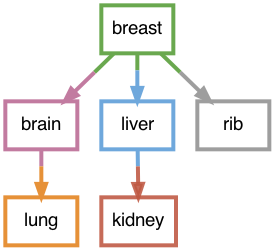

Time elapsed: 10.09921


In [3]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']


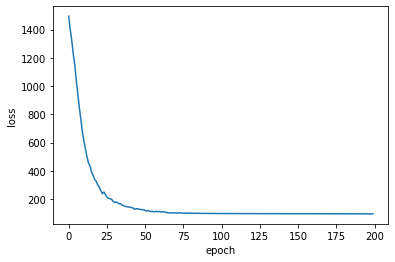

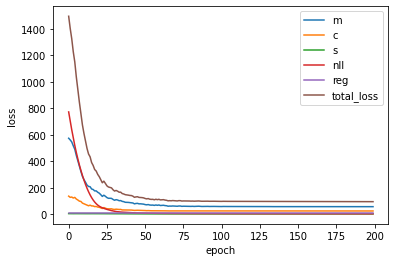

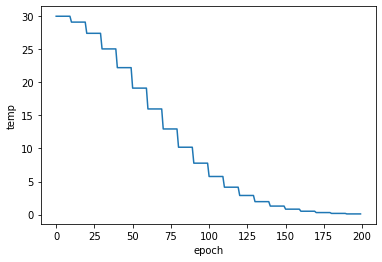

****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.708
Reg: 6.000000476837158
Loss: 87.708


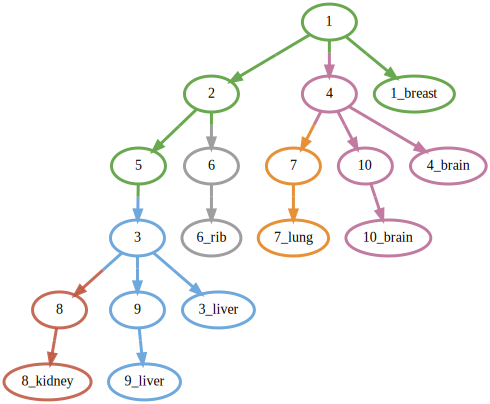

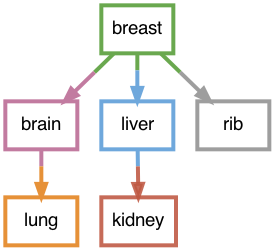

Time elapsed: 12.408423


In [4]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


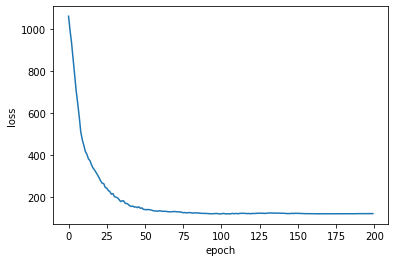

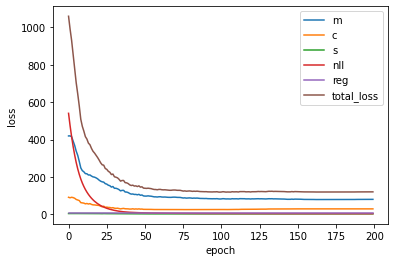

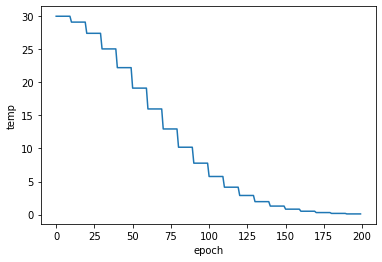

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.383
Reg: 4.999999523162842
Loss: 105.383


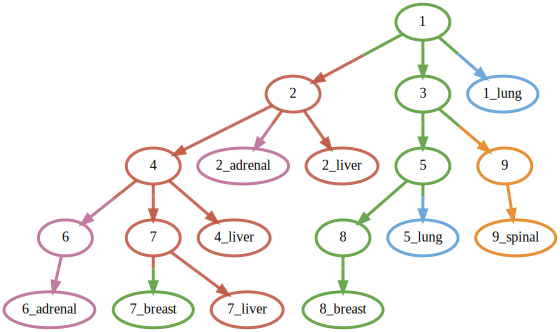

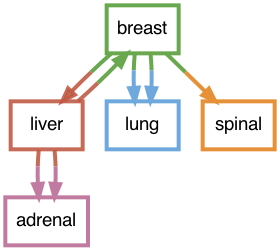

Time elapsed: 10.286272


In [5]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


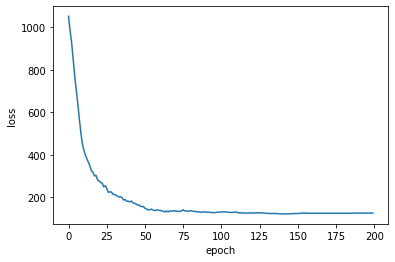

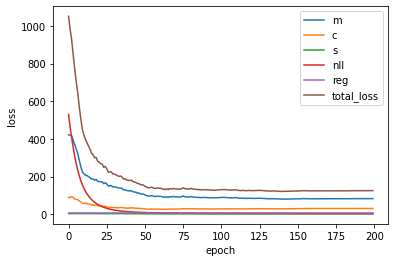

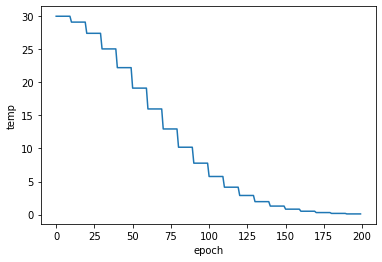

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.784
Reg: 5.000000476837158
Loss: 105.784


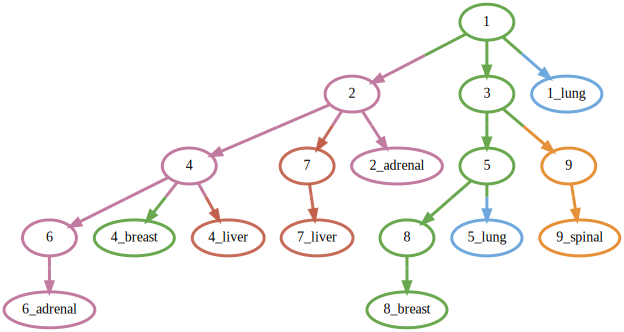

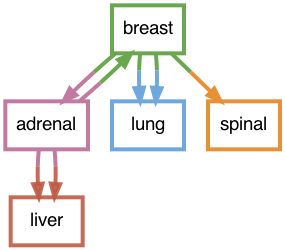

Time elapsed: 10.692178


In [6]:
# Patient A1, tree 2 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


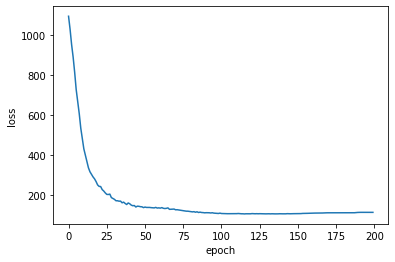

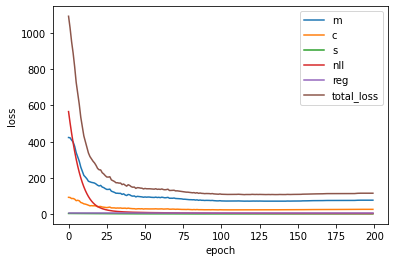

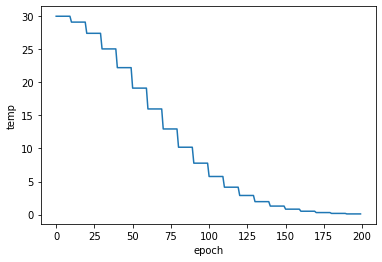

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 3.934
Reg: 5.0
Loss: 99.934


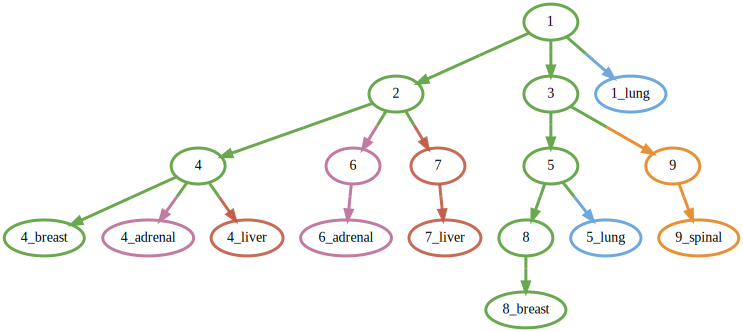

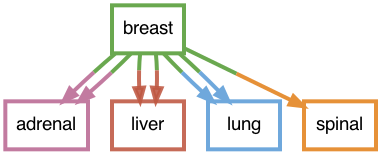

Time elapsed: 9.93304


In [7]:
# Patient A1, tree 3 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.3.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


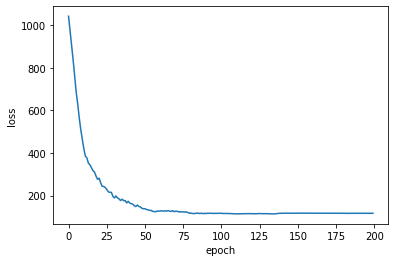

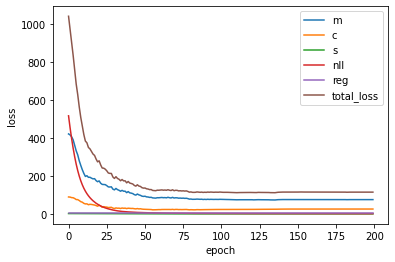

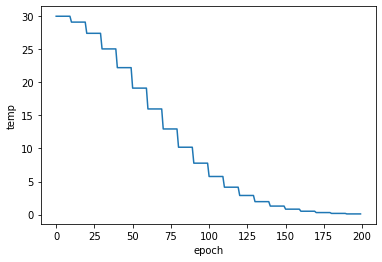

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.614
Reg: 5.0
Loss: 105.614


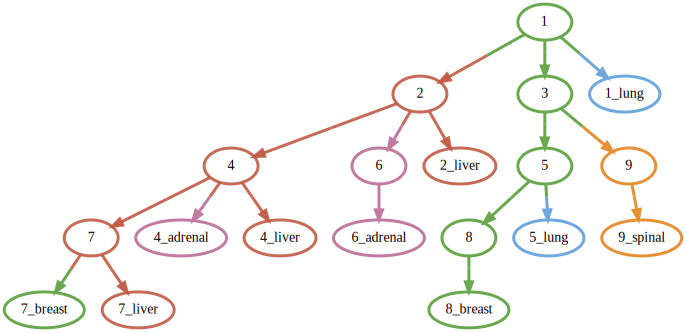

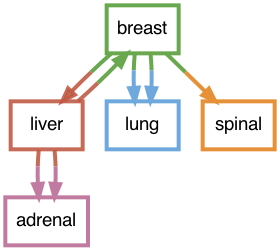

Time elapsed: 9.796707


In [8]:
# Patient A1, tree 4 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.4.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
